In [47]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Markdown
import pandas as pd
import altair as alt
import re
from utils import seconds_to_ms, ms_to_seconds
from results_parser import get_benchmark_results
from benchmarks.overhead_latency import echo

InteractiveShell.ast_node_interactivity = "all"

In [9]:
benchmark_results = get_benchmark_results()


## ipyparallel benchmark results ##

### time_n_tasks ###
The first benchmark comes from benchmarking the runtime of sending
n tasks to m engines. Where the each task is just the echo function. 

In [46]:
??echo

Signature: echo(delay=0)
Docstring: <no docstring>
Source:   
def echo(delay=0):
    def inner_echo(x):
        import time

        if delay:
            time.sleep(delay)
        return x

    return inner_echo
File:      ~/src/ipyparallel_asv/benchmarks/overhead_latency.py
Type:      function


### Results ran on 2019-03-08: ###

,Duration in ms,Number of tasks,Number of engines
0,27.84,1,1
1,150.19,10,1
2,57.62,10,10
3,336.06,100,10
4,412.74,100,100
5,2543.15,1000,100


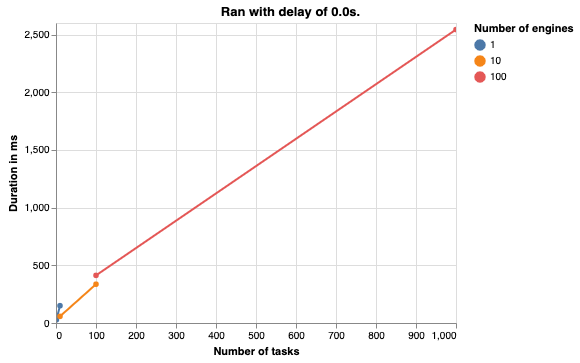

,Duration in ms,Number of tasks,Number of engines
0,130.16,1,1
1,1200.38,10,1
2,159.14,10,10
3,1750.00,100,10
4,521.25,100,100
5,2437.00,1000,100


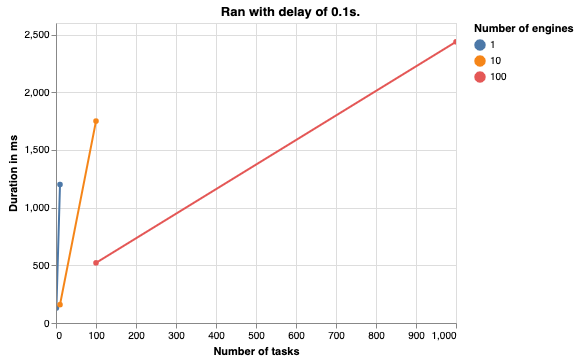

,Duration in ms,Number of tasks,Number of engines
0,1031.35,1,1
1,10253.13,10,1
2,1065.88,10,10
3,12197.25,100,10
4,1184.58,100,100
5,12170.60,1000,100


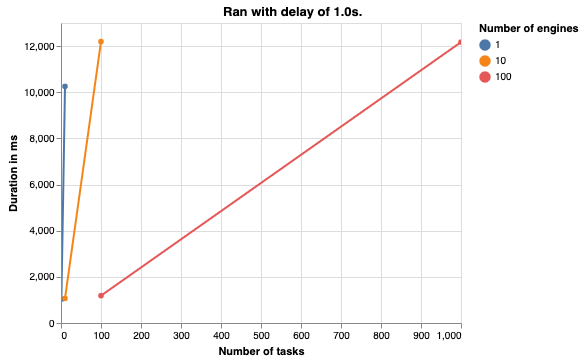

,Number of tasks,Duration in ms
0,100,253.96
1,1000,2504.50
2,10000,26299.09


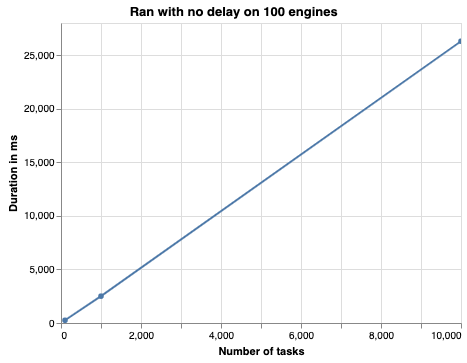

In [77]:
for benchmark_run in benchmark_results.values():
    display(Markdown(f'### Results ran on {benchmark_run.date.date()}: ###'))
    datasource = {}
    for benchmark_name, results in benchmark_run.results_dict.items():
        if not 'time_n_tasks' in benchmark_name or 'NoDelay' in benchmark_name:
            continue
        number_of_engines = int(re.findall('\d+', benchmark_name)[0])
        for duration, tasks_num, delay in\
            [(result.duration_in_ms, result.number_of_tasks, seconds_to_ms(result.delay)) for result in results]:
            if not delay in datasource:
                datasource[delay] = { 'Duration in ms': [], 'Number of tasks': [], 'Number of engines': [] }
            datasource[delay]['Duration in ms'].append(duration)
            datasource[delay]['Number of tasks'].append(tasks_num)
            datasource[delay]['Number of engines'].append(number_of_engines)
    for delay, results_for_delay in datasource.items():            
        data = pd.DataFrame(results_for_delay)
        data
        alt.Chart(data).mark_line(point=True).encode(
            x='Number of tasks',
            y='Duration in ms',
            color='Number of engines:N',
            tooltip='Duration in ms'            
        ).properties(title=f'Ran with delay of {ms_to_seconds(delay)}s.').interactive()
    durations = []
    tasks = []
    for result in benchmark_run.results_dict['overhead_latency.Engines100NoDelay.time_n_tasks']:
        if result.failed:
            continue
        durations.append(result.duration_in_ms)
        tasks.append(result.number_of_tasks)
    data = pd.DataFrame({
        'Number of tasks': tasks,
        'Duration in ms': durations
    })
    data
    alt.Chart(data).mark_line(point=True).encode(
        x='Number of tasks',
        y='Duration in ms',
        tooltip='Duration in ms'            
        ).properties(title='Ran with no delay on 100 engines').interactive()
    

In [ ]:
'overhead_latency.Engines100NoDelay.time_n_tasks'
'throughput.NumpyArrayBroadcast.time_broadcast'